# Setup

In [1]:
%pip install -q huggingface-hub plotly numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from huggingface_hub import login

login()

# Create Plot

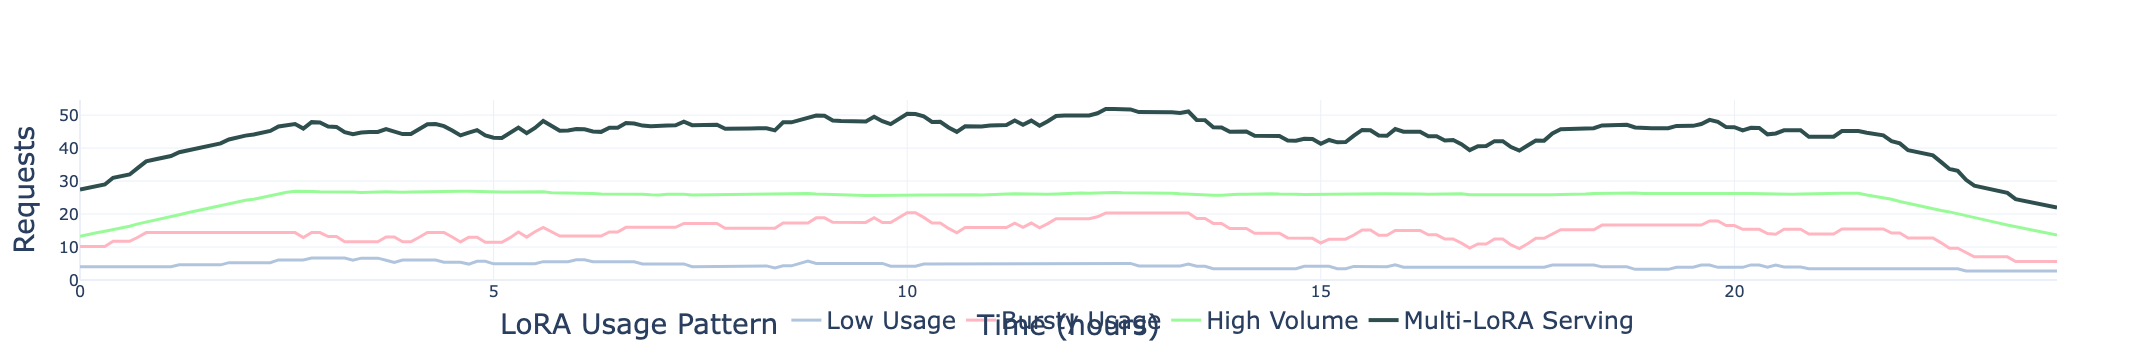

In [18]:
import plotly.graph_objects as go
import numpy as np

# Setting the time scale
time = np.arange(0, 24, 0.1)  # 24 hours, in increments of 0.1 hour

# Generating usage patterns
np.random.seed(42)
low_usage = (np.random.poisson(70, len(time)) * (np.random.rand(len(time)) < 0.15).astype(int))//2 
bursty_usage = np.random.poisson(70, len(time)) * (np.random.rand(len(time)) < 0.15).astype(int)
bursty_usage = np.random.poisson(100, len(time)) * (np.random.rand(len(time)) < 0.2).astype(int)//1.4

high_volume = np.random.normal(loc=15, scale=2, size=len(time))*1.75

# Applying smoothing
smooth_low_usage = np.convolve(low_usage, np.ones(50)/50, mode='same')
smooth_bursty_usage = np.convolve(bursty_usage, np.ones(50)/50, mode='same')
smooth_high_volume = np.convolve(high_volume, np.ones(50)/50, mode='same')
total_usage = smooth_low_usage + smooth_bursty_usage + smooth_high_volume

# Plotting using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=time, y=smooth_low_usage, mode='lines', name='Low Usage', line=dict(color='#B0C4DE', width=3)))  # Light Steel Blue
fig.add_trace(go.Scatter(x=time, y=smooth_bursty_usage, mode='lines', name='Bursty Usage', line=dict(color='#FFB6C1', width=3)))  # Light Pink
fig.add_trace(go.Scatter(x=time, y=smooth_high_volume, mode='lines', name='High Volume', line=dict(color='#98FB98', width=3)))  # Pale Green
fig.add_trace(go.Scatter(x=time, y=total_usage, mode='lines', name='Multi-LoRA Serving', line=dict(color='#2F4F4F', width=4)))  # Dark Slate Gray

fig.update_layout(
    xaxis_title='Time (hours)',
    yaxis_title='Requests',
    legend_title='LoRA Usage Pattern',
    xaxis=dict(
        title_font_size=28,  # Larger axis title font size
        tickfont_size=16  # Larger tick label font size
    ),
    yaxis=dict(
        title_font_size=28,  # Larger axis title font size
        tickfont_size=16  # Larger tick label font size
    ),
    legend=dict(
        x=0.5,  # Horizontal position, 0 is left
        y=-0.1,  # Vertical position, negative values to move it down
        orientation="h",  # Horizontal layout
        xanchor='center',  # Anchor the legend at the center
        yanchor='top'  # Anchor the legend at the top
    ),
    template='plotly_white',
    legend_title_font_size=28,  # Larger legend title font size
    legend_font_size=24  # Larger legend font size
)


fig.show()


# Push Image

In [19]:
image_out = "multi-lora-serving-pattern.png"
fig.write_image(image_out, width=1920, height=1080, scale=2)

In [22]:
from huggingface_hub import HfApi

commit_message_image = input()

api = HfApi()
api.upload_file(
    path_or_fileobj=image_out,
    path_in_repo=f"blog/multi-lora-serving/{image_out}",
    repo_id="huggingface/documentation-images",
    repo_type="dataset",
    commit_message=commit_message_image,
)

 Fixed line width


CommitInfo(commit_url='https://huggingface.co/datasets/huggingface/documentation-images/commit/621a34717b8f174ffc264b32fb96090b3d3434b0', commit_message='Fixed line width', commit_description='', oid='621a34717b8f174ffc264b32fb96090b3d3434b0', pr_url=None, pr_revision=None, pr_num=None)

# Push Notebook

In [23]:
from huggingface_hub import HfApi

notebook = "multi-lora-serving-pattern.ipynb"
commit_message_notebook = input()

api = HfApi()
api.upload_file(
    path_or_fileobj=notebook,
    path_in_repo=f"blog/multi-lora-serving/{notebook}",
    repo_id="huggingface/documentation-images",
    repo_type="dataset",
    commit_message=commit_message_notebook
)

 Fixed line width


CommitInfo(commit_url='https://huggingface.co/datasets/huggingface/documentation-images/commit/481c188cb1ec30af0fb845fd680de2264a21b01c', commit_message='Fixed line width', commit_description='', oid='481c188cb1ec30af0fb845fd680de2264a21b01c', pr_url=None, pr_revision=None, pr_num=None)